<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 3</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Ignacio Aedo;201773556-2;Malla Nueva</h3>
    <h3 align="center">Ethiel Carmona;201773533-3;Malla Nueva</h3>
    <h3 align="center">Mayo 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día *cuando se baje el paro hay fecha*.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab3.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**

## Tips V.2

A la hora de trabajar con números o procesos aleatorios a veces es importante poder replicar lo que usted realiza (pensando en un trabajo que se mostrará a la comunidad científica), para esto se tiene que, para generar la misma secuencia de números aleatorios, se debe pasar una *semilla* al generador de éstos. 

**R**
```R
set.seed(numero)
```

**Python**
```python
numpy.random.seed(numero) #libreria numpy 
random.seed(numero) #libreria random
#O de otra libreria que pueda utilizar para generar números aleatorios
```

Si desea puede aplicar esto en su laboratorio para que se pueda reproducir exactamente lo mismo que usted obtuvo.

In [6]:
## Ejemplo R 

print("Obteniendo el mismo número siempre")
for(i in 1:10){
    set.seed(1) #Esto hará que saquemos el mismo número una y otra vez 
    resultado = sample(c(1:1000),1) #Sacaremos 1 número entre 1 y 1000
    print(resultado)
}

print("Obteniendo la misma secuencia ") #Correr múltiples veces para ver esto 
set.seed(1)
for(i in 1:10){
    resultado = sample(c(1:1000),1)
    print(resultado) #Aquí se obtiene la misma secuencia 
}

SyntaxError: invalid syntax (<ipython-input-6-81168e5b76dd>, line 4)

In [4]:
## Ejemplo Python 
import random 

print("Obteniendo el mismo número siempre")
for i in range(10):
    random.seed(1)
    resultado = random.randint(1,1000)
    print(resultado)

print("Obteniendo la mismas secuencia ") #Correr múltiples veces para ver esto 
random.seed(1)
for i in range(10):
    resultado = random.randint(1,1000)
    print(resultado)

Obteniendo el mismo número siempre
138
138
138
138
138
138
138
138
138
138
Obteniendo la mismas secuencia 
138
583
868
822
783
65
262
121
508
780


## 1. LDA (40p)

Es de mucho interés hoy en día el hecho de poder construir un clasificador que pueda inferir reglas a partir de los datos para poder predecir a futuro, en esta sección trabajará con una versión simplificada del dataset del titanic (data_titanic.csv), la que contiene 3 columnas:

* Age: la edad del pasajero
* Fare: el precio del boleto
* Survived: si sobrevivió a la tragedia o no

(Si, estamos en el ámbito multivariado ahora)

El clasificador, en breves palabras, intenta maximizar $P(Y=survived|X=age,fare)$ asumiendo que los datos ($X$) provienen de una distribución Gaussiana Multivariada. Se espera que usted sea capaz de obtener los máximos verosímiles de los parámetros de esta distribución para poder construir su clasificador **a mano**.

>a) Construya un clasificador LDA que permita distinguir si un pasajero sobrevive o no dado su edad y precio del ticket. *Recomendación: Puede separar una cantidad pequeña de datos para utilizarlos para probar su clasificador, es muy importante que si hace esto, estos datos no sean utilizados en la construcción del clasificador* 

Cualquier uso de las funciones provistas por los lenguajes que implementen LDA implica puntaje 0 en esta sección **sin excepción**.

Esta pregunta es un poco extensa por lo que se recomienda leer bien el material provisto (mas abajo) y los libros guías del curso. No es necesario que responda todo de una, puede ir por partes, es más, esto es recomendable porque así puede ir ganando puntaje y no jugarse todo en un "funciona/no funciona" recuerde explicar bien su razonamiento.

Si se complica mucho intente el caso univariado primero (fare vs survived ó age vs survived), si solamente presenta el univariado podrá optar a solamente 10 puntos del total (siempre y cuando esté bien).

Material que podría resultar útil:
* [Video](https://www.youtube.com/watch?v=azXCzI57Yfc)
* [Articulo LDA](https://towardsdatascience.com/classification-part-2-linear-discriminant-analysis-ea60c45b9ee5)
* [Explicacion matematica de sklearn](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)
* Libros Guía indicados en el Syllabus(verosimilitud)


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy import stats
from scipy.stats import expon
from scipy.stats import exponweib
import math
data=pd.read_csv('titanic.csv')
print("XD")


XD


## 2. Teorema de la Función Inversa (10p)

El teorema de la función inversa permite generar variables aleatorias continuas con una función de distribución $F(x)$ a partir de la inversa $F^{-1}(x)$. Donde los valores generados en la función inversa están regidos por una distribución uniforme $u \sim U(0,1)$. 

En esta sección se trabajará con la distribución Weibull, cuya función de densidad de probabilidad está dada por:

\begin{aligned}
Weibull(\alpha,\beta) = \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1}\cdot exp \left( \frac{-x}{\beta}\right)^{\alpha}
\end{aligned}

Para trabajar el teorema de la función inversa siga los siguientes pasos:

1. Identificar la función que defina a la variable aleatoria.
2. De dicha función calcular la función de densidad acumulada. Explique en breves palabras como obtenerla y si es invertible o no (Lo de invertible hace referencia a esta función de densidad acumulada Weibull en particular y no olvide mencionar cual es la función de densidad acumulada Weibull).
3. De la función de densidad acumulada despejar la variable X. La distribución Weibull a trabajar tiene parámetros $\alpha = 10$ y $\beta = 3$
4. Generar 10000 valores que siguen la distribución $u \sim U(0,1)$ y utilícelos como argumento en la función inversa encontrada
5. Genere una distribución weibull de tamaño 10000 con los mismos $\alpha$ y $\beta$ que la trabajada. Y haga un gráfico de la densidad de dichos valores. 
6. Concluya respecto a lo que observa en ambas gráficas.

La función que define la variable aleatoria: \begin{aligned} \frac{\alpha}{\beta^{\alpha}}x^{\alpha -1}\cdot exp \left( \frac{-x}{\beta}\right)^{\alpha}\end{aligned}

La función de densidad acumulada se obtiene de integrar la función de probabilidad en el intervalo [-inf,x]. De esta forma se obtiene:
\begin{aligned} {1-} exp \left( \frac{-x}{\beta}\right)^{\alpha}\end{aligned}

La función al ser biyectiva y continua se convierte en una función invertible.
Despejando X se obtiene:
\begin{aligned} {\beta}\cdot (-ln \left( {1-y}\right))^{\frac{1}\alpha}\end{aligned}

A continuación se generarán 10.000 valores siguiendo la distribución $u \sim U(0,1)$ y se evaluarán estos valores en la función inversa anterior mencionada:

In [45]:
#inversa=3*(-math.log(1-y))**1/10

valors=np.random.uniform(0,1,10000)
evaluados=[]
for valor in valors:
    evaluados.append((3*(-math.log(1-valor))**(1/10)))

A continuación se generarán 10.000 valores siguiendo la distribución de Weibull con $\alpha = 10$ y $\beta = 3$:

In [46]:
s = exponweib.rvs(10,3,size=10000)
valoresWeeb=[]
for n in s:
    valoresWeeb.append(n)


Graficando los resultados:

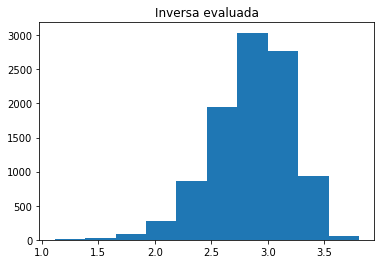

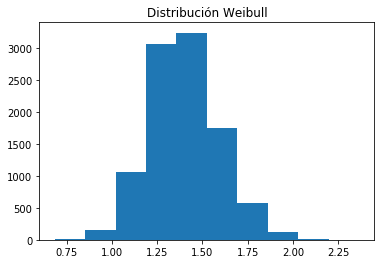

In [47]:
plt.hist(evaluados)
plt.title("Inversa evaluada")
plt.show()
plt.hist(valoresWeeb)
plt.title("Distribución Weibull")
plt.show()

Como se puede observar en los gráficos, a partir de la función inversa evaluando los valores de una distribución normal, obtuvimos una representación aproximada de la distribución original de Weibull. Así, el teorema de la función inversa que establece: "generar variables aleatorias continuas con una función de distribución $F(x)$ a partir de la inversa $F^{-1}(x)$, donde los valores generados en la función inversa están regidos por una distribución uniforme $u \sim U(0,1)$ ", queda demostrado de manera empírica.

## 3. Teorema del Límite Central (30p)

El teorema del límite central es uno de los postulados más importantes de estadística. En esta sección se procederá a comprobarlo en su forma clásica. 

Sea $x_{1},x_{2},....,x_{n}$ una muestra aleatoria de tamaño $n$ IID extraidas de una distribución con valor esperado $\mu$ y varianza finita $\sigma^{2}$. Si calculamos la media muestral: 

$$ \bar{X}_{n} = \frac{\sum x_{i}}{n}$$

Y repetimos este proceso una gran cantidad de veces $(P)$ tendremos una distribución de las medias de las muestras (*Sample mean distribution*). El TLC establece que, si el número de repeticiones es lo suficientemente grande: 

$$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$ 

En esta sección se trabajará con la siguiente distribución y se demostrará lo que enuncia el TLC.

| Valor | Probabilidad |
|:-----:|:------------:|
|   1   |      0.1     |
|   2   |      0.2     |
|   5   |     0.05     |
|   6   |     0.05     |
|   7   |      0.2     |
|   9   |     0.10     |
|   10  |     0.05     |
|   11  |     0.2      |
|   12  |     0.05     |

>a) Determine el valor esperado y la varianza **TEÓRICOS**

Se procede a calcular el valor esperado (Σx*p(x)) y la varianza (cuadrado de la desviación estándar) teóricos:

In [13]:
promedio=(1+2+5+6+7+9+10+11+12)/9
valorEsperado= 1*0.1+2*0.2+5*0.05+6*0.05+7*0.2+9*0.1+10*0.05+11*0.2+12*0.05
varianza=1*0.1+4*0.2+25*0.05+36*0.05+49*0.2+81*0.1+100*0.05+121*0.2+144*0.05 - valorEsperado**2
print("El valor esperado y la varianza teóricos son, respectivamente: ",valorEsperado,varianza)

El valor esperado y la varianza teóricos son, respectivamente:  6.65 14.027500000000003


Luego el valor esperado teórico tiene un valor de 6,65 y la varianza teórica un valor de 14,0275.

>b) Con $P = 10,1000$ calcule la media de muestras de tamaño : $n \in[2,10,30,100,1000]$ compare los resultados obtenidos para los dos $P$ dados. Presente los datos en una tabla ordenada con columnas: $n,\;P=10,\;P=1000$ Comente, ¿qué parece influir mas, la cantidad de repeticiones, el tamaño de la muestra o ambas?

El siguiente programa genera P listas con n valores aleatorios (siguiendo las probabilidades entregadas) guardando sus promedios para luego promediar los mismos y mostrarlos por pantalla.

In [10]:
valores=[1,2,5,6,7,9,10,11,12]
enes=[2,10,30,100,1000]
promedios=[]
random.seed(1)
for n in enes:
    promedioP10=0
    p=0
    while(p<10):
        lista=random.choices(valores,weights=[10,20,5,5,20,10,5,20,5],k=n)
        #print(lista)
        #print(np.average(lista))
        promedioP10=np.average(lista)+promedioP10
        p+=1
    promedioP1000=0
    p=0
    while(p<1000):
        lista=random.choices(valores,weights=[10,20,5,5,20,10,5,20,5],k=n)
        #print(lista)
        #print(np.average(lista))
        promedioP1000=np.average(lista)+promedioP1000
        p+=1
    promedios.append((n,10,promedioP10/10,1000,promedioP1000/1000)) #tupla=(n=cantidad de valores a crear,P=10,promedio de los promedios al repetirlo 10 veces, P=1000, Promedio de los promedios al repetirlo 10000 veces)
print(promedios)    

[(2, 10, 6.7, 1000, 6.6805), (10, 10, 6.779999999999999, 1000, 6.633400000000001), (30, 10, 6.4799999999999995, 1000, 6.651700000000001), (100, 10, 6.687, 1000, 6.660219999999998), (1000, 10, 6.6593, 1000, 6.649699999999993)]


El resultado interpretado se muestra a continuación en la siguiente tabla:

|   n   |     P=10    |      P=1000      |
|:-----:|:------------:|:----------:|
|  2    |      6.7     |       6.6805     |
|  10   |      6.78     |     6.63       |
|  30   |     6.48     |      6.65     |
|  100  |     6.687    |       6.66     |
|  1000 |      6.659    |      6.65      |          


Observando los resultados obtenidos, podemos concluir que ambas variables (tamaño de la muestra y número de repeticiones) son igual de importantes, ya que una muestra muy pequeña (n=2) no es representativa aunque el número de repeticiones (P) sea alto. Sin embargo, a medida que se aumenta la muestra y también el número de repeticiones, nos acercamos cada vez más y con mayor presición al valor esperado teórico, por lo que una muestra considerable y un número alto de repeticiones son indispensables.

>c) Con lo obtenido en b) haga un histograma para las muestras de tamaño 2, 30 y 1000 de P = 1000. Comente lo que observa y concluya. ¿Se cumple lo que enuncia el teorema del límite central?

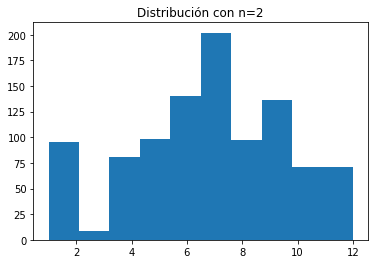

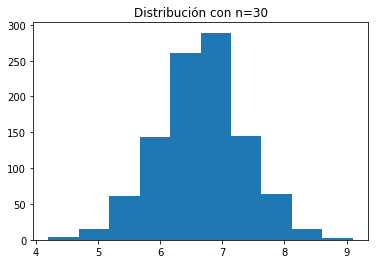

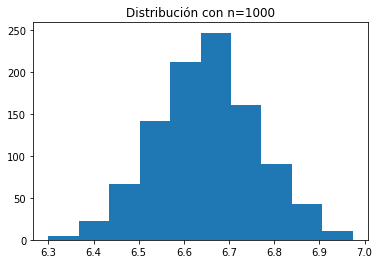

In [22]:
enes=[2,30,1000]
random.seed(1)
for n in enes:
    promedioP1000=[]
    p=0
    while(p<1000):
        lista=random.choices(valores,weights=[10,20,5,5,20,10,5,20,5],k=n)
        #print(lista)
        #print(np.average(lista))
        promedioP1000.append(np.average(lista))
        p+=1
    plt.hist(promedioP1000)
    plt.title("Distribución con n="+str(n))
    plt.show()

Se puede observar que a medida que la muestra tiene más elementos y se mantiene un número de repeticiones alto (P=1000) la distribución va tomando forma normal: $$ \bar{X} \sim N\left(\mu,\sqrt{\frac{\sigma^{2}}{n}}\right)$$  Donde el valor esperado y la varianza corresponden a los teóricos calculados en el inciso a). Debido a esto, se puede concluir que se cumple lo que enuncia el teorema del límite central.

## 4. Ley de los Grande Números (20p)

En estadística, la ley de los grandes números engloba teoremas que describen el comportamiento del promedio de una distribución de variables aleatorias. La ley de los grandes números dice que, en pocas palabras, a medida que se aumenta el tamaño muestral el promedio de la distribución de variables aleatorias converge al promedio de la población completa.

Un estudio realizado en el casino de la universidad MSU, indica que el tiempo de espera en la cola del casino para obtener su almuerzo puede modelarse como una distribución Exponencial con parámetro: $\lambda = 0.1$

>a) **Utilizando las funciones provistas por los lenguajes** calcule la probabilida **teórica** de que un alumno espere menos de 10 minutos, exactamente 20 minutos y más de 50 minutos.

Utilizando las funciones provistas por el lenguaje, se calculan las probabilidades pedidas utilizando una distribución exponencial:

In [58]:
P1=expon.cdf(10,scale=1/0.1) #P(X<10)
P2=0
P3=1-expon.cdf(50,scale=1/0.1)#P(X>50)
print(P1,P2,P3)

0.6321205588285577 0 0.006737946999085476


Luego, la probabilidad de esperar menos de 10 minutos P(X<10) es de 60%, la probabilidad de esperar exactamente 20 minutos es 0 debido a que por definición en probabilidad continua, la probabilidad de un punto es 0, y por último la probabilidad de esperar más de 50 minutos P(X>50) es de 0.67%.

>b) Ahora genere 3 muestras de dicha distribución exponencial, con tamaños n = 5, 100, 300, 10000. Para cada una de estas muestras determine las mismas probabilidades calculadas en a) de manera empírica, comente sus resultados.

In [118]:
m1=[]
m2=[]
m3=[]
m4=[]
random.seed(1)
n10 = expon.rvs(scale=1/0.1,  size = 5) 
n100 = expon.rvs(scale=1/0.1,  size = 100) 
n300 = expon.rvs(scale=1/0.1,  size = 300) 
n10000 = expon.rvs(scale=1/0.1,  size = 10000) 
for n in n10:
    m1.append(n)
for n in n100:
    m2.append(n)
for n in n300:
    m3.append(n)
for n in n10000:
    m4.append(n)
casoFavorable=0
casoFavorable2=0
veinte=0
random.seed(1)
for num in m1:
    if(num<10):
        casoFavorable+=1
    if(num>50):
        casoFavorable2+=1
    if(num==20):
        veinte+=1
print("\n")
print("Para n=",5," la probabilidad de que se demore menos de 10 minutos es ",casoFavorable/5," y la probabilidad de que se demore más de 50 minutos es ",casoFavorable2/5)
print("La probabilidad de que se demore exactamente 20 minutos es de ",veinte/5)
casoFavorable=0
casoFavorable2=0
veinte=0
for num in m2:
    if(num<10):
        casoFavorable+=1
    if(num>50):
        casoFavorable2+=1   
    if(num==20):
        veinte+=1
print("Para n=",100," la probabilidad de que se demore menos de 10 minutos es ",casoFavorable/100," y la probabilidad de que se demore más de 50 minutos es ",casoFavorable2/100)
print("La probabilidad de que se demore exactamente 20 minutos es de ",veinte/100)
casoFavorable=0
casoFavorable2=0
veinte=0
for num in m3:
    if(num<10):
        casoFavorable+=1
    if(num>50):
        casoFavorable2+=1    
    if(num==20):
        veinte+=1
print("Para n=",300," la probabilidad de que se demore menos de 10 minutos es ",casoFavorable/300," y la probabilidad de que se demore más de 50 minutos es ",casoFavorable2/300)
print("La probabilidad de que se demore exactamente 20 minutos es de ",veinte/300)
veinte=0
casoFavorable=0
casoFavorable2=0
for num in m4:
    if(num<10):
        casoFavorable+=1
    if(num>50):
        casoFavorable2+=1  
    if(num==20):
        veinte+=1
print("Para n=",10000," la probabilidad de que se demore menos de 10 minutos es ",casoFavorable/10000," y la probabilidad de que se demore más de 50 minutos es ",casoFavorable2/10000)
print("La probabilidad de que se demore exactamente 20 minutos es de ",veinte/10000)



Para n= 5  la probabilidad de que se demore menos de 10 minutos es  0.4  y la probabilidad de que se demore más de 50 minutos es  0.0
La probabilidad de que se demore exactamente 20 minutos es de  0.0
Para n= 100  la probabilidad de que se demore menos de 10 minutos es  0.65  y la probabilidad de que se demore más de 50 minutos es  0.0
La probabilidad de que se demore exactamente 20 minutos es de  0.0
Para n= 300  la probabilidad de que se demore menos de 10 minutos es  0.6166666666666667  y la probabilidad de que se demore más de 50 minutos es  0.01
La probabilidad de que se demore exactamente 20 minutos es de  0.0
Para n= 10000  la probabilidad de que se demore menos de 10 minutos es  0.638  y la probabilidad de que se demore más de 50 minutos es  0.0058
La probabilidad de que se demore exactamente 20 minutos es de  0.0


Observando los resultados, se puede concluir que de manera empírica se obtienen resultados muy similares al teórico, los cuales aumentan de presición al aumentar el tamaño de la muestra.

>c) ¿Cuál debería ser la media **teórica** de todas estas distribuciones? ¿Y cuál es la empírica? ¿Si difieren o son iguales a qué se debe esto?

La media teórica de la distribución exponencial corresponde a 1/λ. Dado que en nuestro caso λ=0.1, la media teórica corresponde a 10.
La media empírica se calcula a continuación para cada muestra (n = 5, 100, 300, 10000):

In [104]:
suma=0
for n in m1:
    suma=suma+n
print("La media empírica con n=5 es ",suma/5)
suma=0
for n in m2:
    suma=suma+n
print("La media empírica con n=100 es ",suma/100)
suma=0
for n in m3:
    suma=suma+n
print("La media empírica con n=300 es ",suma/300)
suma=0
for n in m4:
    suma=suma+n
print("La media empírica con n=10000 es ",suma/10000)

La media empírica con n=5 es  13.181144683823167
La media empírica con n=100 es  10.005478097810174
La media empírica con n=300 es  10.001649891538175
La media empírica con n=10000 es  9.950321885385717


Como podemos observar, a medida que la muestra aumenta su tamaño, la media converge a 10 siendo el valor empírico y el teórico casi iguales. Esto se debe a que los elementos de la muestra siguen una distribución exponencial. Si el valor de n tendiese a infinito, se obtendría una media teórica y empírica exactamente iguales.

>d) Genere **un** gráfico de 4 boxplot (1 de cada distribución) y compárelos. Comente lo que observa y concluya respecto a la ley de los grandes números.

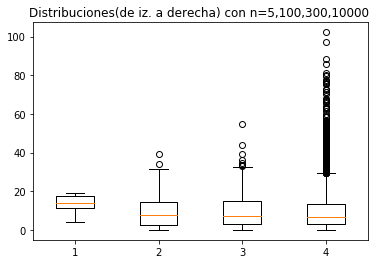

In [117]:
data = []
data.append(m1)
data.append(m2)
data.append(m3)
data.append(m4)
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Distribuciones(de iz. a derecha) con n=5,100,300,10000 ')
plt.show()

Podemos observar que a medida que la muestra aumenta su tamaño, la mediana (Q2 de los boxplots) se acerca cada vez más a 10, a la vez que aumenta la cantidad de *outliers* superiores lo cual indica un mayor grado de dispersión de la muestra. Esto deja en evidencia que se cumple la Ley de los Grande Números, la cual enuncia que a medida que se aumenta el tamaño muestral el promedio de la distribución de variables aleatorias converge al promedio de la población completa.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el día *anunciado post_paro*
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.3
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)


## Meme 

Si se dividen el trabajo del lab, que no quede así:

<img src="img/trabajo.png">

